In [8]:
import networkx as nx
import matplotlib.pyplot as plt
from GA import genetic_algorithm

def solve(problem, 
          population_size=100, 
          generations=100, 
          mutation_rate=0.1, 
          mutation_algorithm='swap', 
          crossover_algorithm='order', 
          selection_algorithm='elitism'):
    n_cities = len(problem)
    
    solution = genetic_algorithm(n_cities, problem, 
                                 population_size=population_size, 
                                 generations=generations, 
                                 mutation_rate=mutation_rate, 
                                 mutation_algorithm=mutation_algorithm, 
                                 crossover_algorithm=crossover_algorithm, 
                                 selection_algorithm=selection_algorithm)
    
    return solution['distance'], solution['route'], solution['fitness']

def visualize(problem, route, draw_weight=False, initial=False):
    n_cities = len(problem)
    
    # Create a graph
    G = nx.Graph()
    for i in range(n_cities):
        for j in range(i + 1, n_cities):
            G.add_edge(i, j, weight=problem[i][j])

    pos = nx.circular_layout(G, scale=2)

    plt.figure(figsize=(14, 7))
    if initial:
        plt.subplot(121)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
        if draw_weight:
            labels = nx.get_edge_attributes(G, 'weight')
            nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=5, label_pos=0.5)
        plt.title("Initial Graph")

    # Highlight the best route and remove non-route edges for clarity
    route_edges = [(route[i], route[i + 1]) for i in range(len(route) - 1)]
    route_edges.append((route[-1], route[0]))  # Complete the cycle

    # Remove non-route edges
    non_route_edges = [edge for edge in G.edges() if edge not in route_edges and (edge[1], edge[0]) not in route_edges]
    G.remove_edges_from(non_route_edges)

    plt.subplot(122)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
    nx.draw_networkx_edges(G, pos, edgelist=route_edges, edge_color='r', width=2)
    if draw_weight:
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=5, label_pos=0.6)
    plt.title(f"Best Route\n{route}")

    plt.show()

In [9]:
def read_file(file_name):
    with open(file_name, 'r') as file:
        problem = []
        for line in file:
            if line.strip():
                row = list(map(int, line.split()))
                problem.append(row)
    return problem
problem6 = read_file('data/6Cities-1248.txt')

In [10]:
problem = problem6
distances, route, fitness = solve(problem, generations=100, mutation_rate=0.01, population_size=100, 
                                    mutation_algorithm='swap', crossover_algorithm='order', selection_algorithm='elitism')
print(distances)
print(route)

1248
[0, 5, 4, 3, 2, 1, 0]


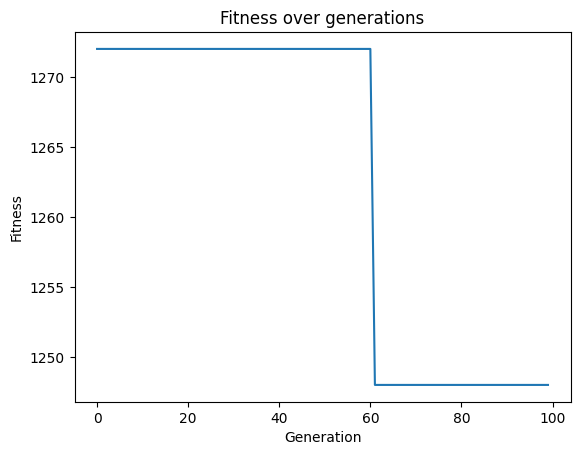

In [11]:
def plot_fitness(fitness):
    plt.plot(fitness)
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Fitness over generations")
    plt.show()
plot_fitness(fitness)

*** Tournament Selection - Single-Point Crossover - Inversion Mutation ***

In [12]:
problem = problem6
distances, route, fitness = solve(problem, generations=100, mutation_rate=0.01, population_size=100, 
                                    selection_algorithm='tournament', mutation_algorithm='inversion', crossover_algorithm='single_point')
print(distances)
print(route)

1248
[0, 5, 4, 3, 2, 1, 0]


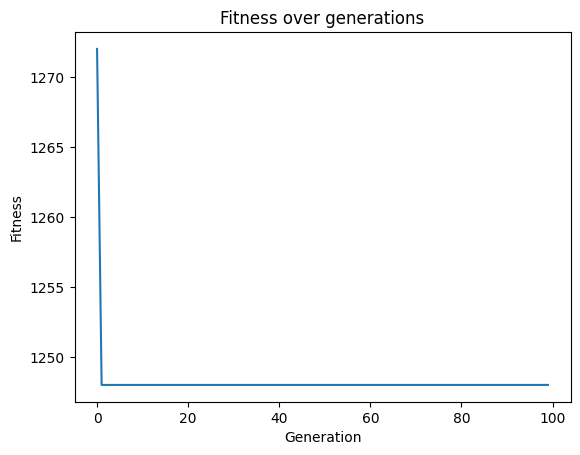

In [13]:
def plot_fitness(fitness):
    plt.plot(fitness)
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Fitness over generations")
    plt.show()
plot_fitness(fitness)

# Đồ thị fitness cho thấy sự cải thiện ban đầu nhanh chóng khi fitness giảm từ khoảng 1270 xuống 1245 chỉ trong một vài thế hệ đầu, nhờ vào sự kết hợp hiệu quả của tournament selection, single-point crossover và inversion mutation. Tournament selection giúp lựa chọn các cá thể tốt nhất, đảm bảo rằng các đặc điểm tốt được duy trì qua các thế hệ. Single-point crossover giữ lại thông tin từ một phần của bố mẹ, giúp duy trì cấu trúc tốt, trong khi inversion mutation tăng cường đa dạng bằng cách đảo ngược thứ tự của một đoạn trên cá thể. Tuy nhiên, sau cải thiện ban đầu, đồ thị trở nên ổn định ở khoảng 1245, cho thấy thuật toán đã tìm ra một lời giải cận tối ưu và không cải thiện đáng kể thêm qua các thế hệ.

*** Rank Selection - Two-Point Crossover - Scramble Mutation ***

In [14]:
problem = problem6
distances, route, fitness = solve(problem, generations=100, mutation_rate=0.01, population_size=100, 
                                    selection_algorithm='rank', mutation_algorithm='scramble', crossover_algorithm='two_point')
print(distances)
print(route)

1248
[0, 5, 4, 3, 2, 1, 0]


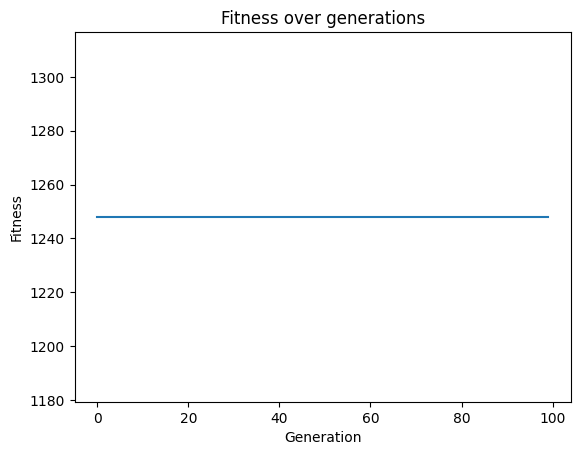

In [15]:
def plot_fitness(fitness):
    plt.plot(fitness)
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Fitness over generations")
    plt.show()
plot_fitness(fitness)

# Đồ thị cho thấy fitness ban đầu đã ở múc 1248 và ổn định ở những thế hệ sau không thay đổi --> tìm ra đáp án tối ưu. Rank Selection duy trì các cá thể tốt, nhưng với 6 thành phố, thuật toán nhanh chóng đạt nghiệm cục bộ. Two-Point Crossover và Scramble Mutation (tỷ lệ đột biến 0.01) tạo ra một số đa dạng, nhưng không đủ để thoát khỏi nghiệm cục bộ. 

*** Roulette wheel selection - Uniform crossover - Insertion mutation ***

In [28]:
problem = problem6
distances, route, fitness = solve(problem, generations=100, mutation_rate=0.01, population_size=100, 
                                    selection_algorithm='roulette_wheel', mutation_algorithm='insertion', crossover_algorithm='uniform')
print(distances)
print(route)

1248
[0, 5, 4, 3, 2, 1, 0]


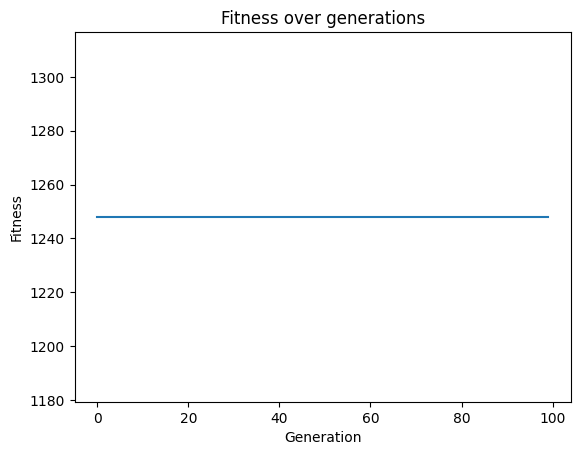

In [29]:
def plot_fitness(fitness):
    plt.plot(fitness)
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Fitness over generations")
    plt.show()
plot_fitness(fitness)

# Đồ thị cho thấy fitness ban đầu đã ở múc 1248 và ổn định ở những thế hệ sau không thay đổi --> tìm ra đáp án tối ưu. Tương tự với bộ ba ở trên